In [80]:
import pandas as pd

df = pd.read_csv("cleaned_bank_dataset.csv")

In [81]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_encoded
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [82]:
df_clean = df.copy()

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ['pdays', 'age']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [84]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['default', 'housing', 'loan']
label_enc = LabelEncoder()

for col in binary_cols:
    df[col] = label_enc.fit_transform(df[col])

In [85]:
one_hot_cols = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [86]:
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.750000,0,0,0,261,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
1,0.769231,0,0,0,149,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
2,0.384615,0,1,0,226,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
3,0.442308,0,0,0,151,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
4,0.750000,0,0,1,307,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False


In [87]:
X = df[['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 
        'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 
        'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_basic.6y', 'education_basic.9y', 
        'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'contact_telephone', 
        'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 
        'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']]

y = df['y_encoded']

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [89]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['campaign', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [90]:
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.750000,0,0,0,261,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
1,0.769231,0,0,0,149,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
2,0.384615,0,1,0,226,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
3,0.442308,0,0,0,151,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
4,0.750000,0,0,1,307,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False


In [91]:
X.head()

,age,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.750000,0,0,0,1,1.0,0,1.1,93.994,-36.4,...,True,False,False,False,True,False,False,False,True,False
1,0.769231,0,0,0,1,1.0,0,1.1,93.994,-36.4,...,True,False,False,False,True,False,False,False,True,False
2,0.384615,0,1,0,1,1.0,0,1.1,93.994,-36.4,...,True,False,False,False,True,False,False,False,True,False
3,0.442308,0,0,0,1,1.0,0,1.1,93.994,-36.4,...,True,False,False,False,True,False,False,False,True,False
4,0.750000,0,0,1,1,1.0,0,1.1,93.994,-36.4,...,True,False,False,False,True,False,False,False,True,False


In [92]:
print(X_train.dtypes.value_counts())
print(X_train.select_dtypes(include=['object', 'bool']).columns)

bool       34
float64     8
int32       3
int64       1
Name: count, dtype: int64
Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')


In [93]:
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'int' for col in X_test.select_dtypes('bool').columns})

In [94]:
X_train = X_train.astype({col: 'category' for col in X_train.select_dtypes('object').columns})
X_train = X_train.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

X_test = X_test.astype({col: 'category' for col in X_test.select_dtypes('object').columns})
X_test = X_test.apply(lambda x: x.cat.codes if x.dtype.name == 'category' else x)

In [95]:
df.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0.750000,0,0,0,261,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
1,0.769231,0,0,0,149,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
2,0.384615,0,1,0,226,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
3,0.442308,0,0,0,151,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False
4,0.750000,0,0,1,307,1,1.0,0,1.1,93.994,...,True,False,False,False,True,False,False,False,True,False


In [96]:
print(X_train.dtypes.value_counts())
print(X_train.select_dtypes(include=['object', 'bool']).columns)

int32      37
float64     8
int64       1
Name: count, dtype: int64
Index([], dtype='object')


In [97]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=None, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Linear SVC": LinearSVC(max_iter=1000, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("="*50)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

Model: Logistic Regression
Accuracy: 0.9006

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6417
           1       0.71      0.21      0.32       820

    accuracy                           0.90      7237
   macro avg       0.81      0.60      0.63      7237
weighted avg       0.89      0.90      0.88      7237

Confusion Matrix:
[[6349   68]
 [ 651  169]]
Model: Decision Tree
Accuracy: 0.8383

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      6417
           1       0.30      0.32      0.31       820

    accuracy                           0.84      7237
   macro avg       0.61      0.61      0.61      7237
weighted avg       0.84      0.84      0.84      7237

Confusion Matrix:
[[5806  611]
 [ 559  261]]
Model: Random Forest
Accuracy: 0.8947

Classification Report:
              precision    recall  f1-score   support

         

C:\Users\anukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:21:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBoost
Accuracy: 0.9015

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6417
           1       0.72      0.21      0.33       820

    accuracy                           0.90      7237
   macro avg       0.82      0.60      0.64      7237
weighted avg       0.89      0.90      0.88      7237

Confusion Matrix:
[[6351   66]
 [ 647  173]]
Model: KNN
Accuracy: 0.8911

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6417
           1       0.54      0.25      0.34       820

    accuracy                           0.89      7237
   macro avg       0.73      0.61      0.64      7237
weighted avg       0.87      0.89      0.87      7237

Confusion Matrix:
[[6248  169]
 [ 619  201]]
Model: Naive Bayes
Accuracy: 0.8353

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import numpy as np

In [99]:
from sklearn.metrics import f1_score

print("{:<20} {:<15} {:<15}".format("Model", "CV F1 Score", "Test ROC-AUC"))
print("="*50)

for name, model in models.items():
    cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()

    model.fit(X_train, y_train)

    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)  

    roc_auc = roc_auc_score(y_test, y_probs)

    print("{:<20} {:<15.4f} {:<15.4f}".format(name, cv_f1, roc_auc))

Model                CV F1 Score     Test ROC-AUC   
Logistic Regression  0.3260          0.7888         
Decision Tree        0.3154          0.6146         
Random Forest        0.3452          0.7723         
Gradient Boosting    0.3464          0.8014         


C:\Users\anukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:23:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\anukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:23:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\anukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:23:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\anukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:23:27] WARNING: C:\actio

XGBoost              0.3306          0.8011         
KNN                  0.3272          0.7198         
Naive Bayes          0.3805          0.7633         
Linear SVC           0.3075          0.7860         


In [100]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
rf_param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'loss': ['log_loss', 'exponential'],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [102]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(rf, rf_param_grid, n_iter=20, cv=5, scoring='f1', n_jobs=-1, verbose=1, random_state=42)
rf_random.fit(X_train, y_train)
print("Best RF Params:", rf_random.best_params_)

gb = GradientBoostingClassifier(random_state=42)
gb_random = RandomizedSearchCV(gb, gb_param_grid, n_iter=20, cv=5, scoring='f1', n_jobs=-1, verbose=1, random_state=42)
gb_random.fit(X_train, y_train)
print("Best GB Params:", gb_random.best_params_)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_random = RandomizedSearchCV(xgb, xgb_param_grid, n_iter=20, cv=5, scoring='f1', n_jobs=-1, verbose=1, random_state=42)
xgb_random.fit(X_train, y_train)
print("Best XGB Params:", xgb_random.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best RF Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'log_loss', 'bootstrap': False}
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best GB Params: {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 5, 'loss': 'exponential', 'learning_rate': 0.1}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\anukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\anukr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:34:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGB Params: {'subsample': 0.6, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


In [103]:
best_rf = rf_random.best_estimator_
best_gb = gb_random.best_estimator_
best_xgb = xgb_random.best_estimator_

In [104]:
from sklearn.metrics import classification_report, confusion_matrix

rf_preds = best_rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, rf_preds))

gb_preds = best_gb.predict(X_test)
print("Gradient Boosting Report:\n", classification_report(y_test, gb_preds))

xgb_preds = best_xgb.predict(X_test)
print("XGBoost Report:\n", classification_report(y_test, xgb_preds))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      6417
           1       0.69      0.25      0.37       820

    accuracy                           0.90      7237
   macro avg       0.80      0.62      0.66      7237
weighted avg       0.89      0.90      0.88      7237

Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      6417
           1       0.64      0.26      0.37       820

    accuracy                           0.90      7237
   macro avg       0.78      0.62      0.66      7237
weighted avg       0.88      0.90      0.88      7237

XGBoost Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      6417
           1       0.63      0.26      0.37       820

    accuracy                           0.90      7237
   macro avg       0.77      0.62      0.66      7237
weighte

In [105]:
models = {
    'Random Forest': rf_random.best_estimator_,
    'Gradient Boosting': gb_random.best_estimator_,
    'XGBoost': xgb_random.best_estimator_
}

for name, model in models.items():
    print(f"Model: {name}")
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6417
           1       0.69      0.25      0.37       820

    accuracy                           0.90      7237
   macro avg       0.80      0.62      0.66      7237
weighted avg       0.89      0.90      0.88      7237

Confusion Matrix:
[[6322   95]
 [ 611  209]]
Model: Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      6417
           1       0.64      0.26      0.37       820

    accuracy                           0.90      7237
   macro avg       0.78      0.62      0.66      7237
weighted avg       0.88      0.90      0.88      7237

Confusion Matrix:
[[6296  121]
 [ 604  216]]
Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      6417
           1     

In [106]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"=== {model_name} Report ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

=== Random Forest Report ===
Accuracy: 0.9024457648196766
F1 Score: 0.3718861209964413
ROC-AUC: 0.7927478268471324

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      6417
           1       0.69      0.25      0.37       820

    accuracy                           0.90      7237
   macro avg       0.80      0.62      0.66      7237
weighted avg       0.89      0.90      0.88      7237



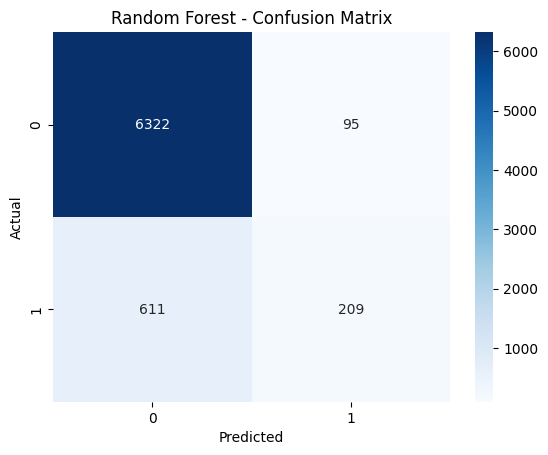

=== Gradient Boosting Report ===
Accuracy: 0.899820367555617
F1 Score: 0.37337942955920483
ROC-AUC: 0.7852998133768154

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      6417
           1       0.64      0.26      0.37       820

    accuracy                           0.90      7237
   macro avg       0.78      0.62      0.66      7237
weighted avg       0.88      0.90      0.88      7237



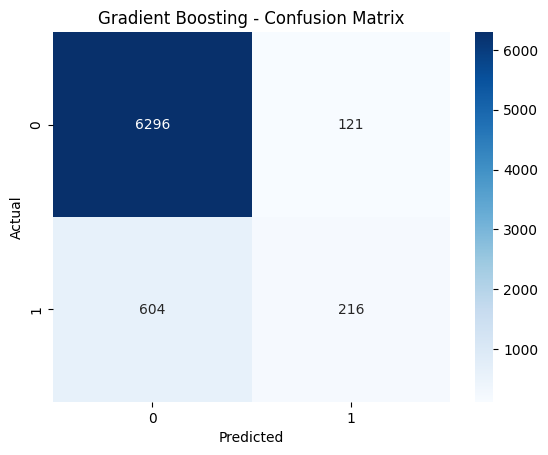

=== XGBoost Report ===
Accuracy: 0.8991294735387592
F1 Score: 0.3717728055077453
ROC-AUC: 0.7789987153027211

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      6417
           1       0.63      0.26      0.37       820

    accuracy                           0.90      7237
   macro avg       0.77      0.62      0.66      7237
weighted avg       0.88      0.90      0.88      7237



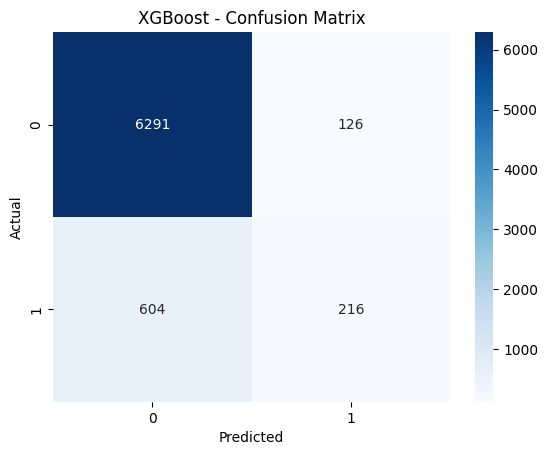

In [107]:
evaluate_model(rf_random.best_estimator_, X_test, y_test, "Random Forest")
evaluate_model(gb_random.best_estimator_, X_test, y_test, "Gradient Boosting")
evaluate_model(xgb_random.best_estimator_, X_test, y_test, "XGBoost")

In [118]:
'Gradient Boosting is the best model'

'Gradient Boosting is the best model'

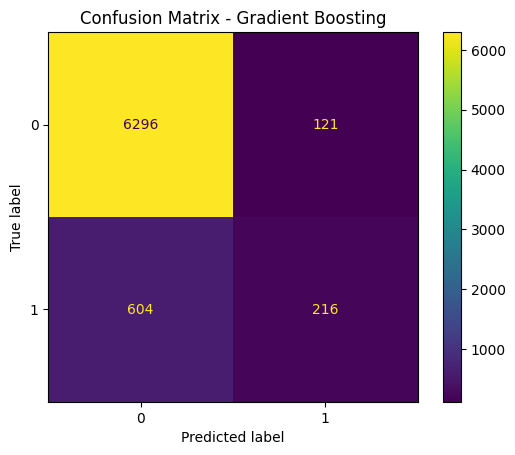

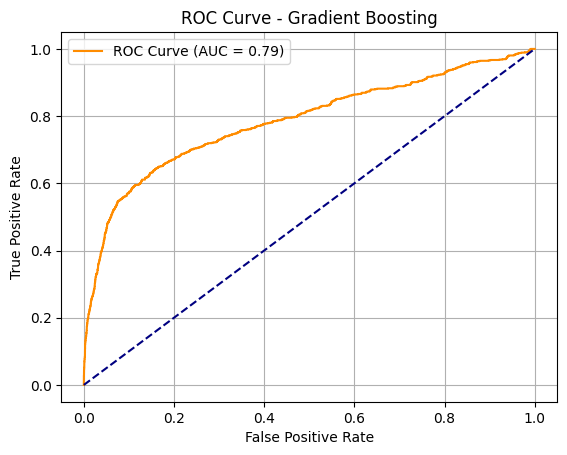

In [122]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

ConfusionMatrixDisplay.from_estimator(gb_random.best_estimator_, X_test, y_test)
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

y_probs = gb_random.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("ROC Curve - Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

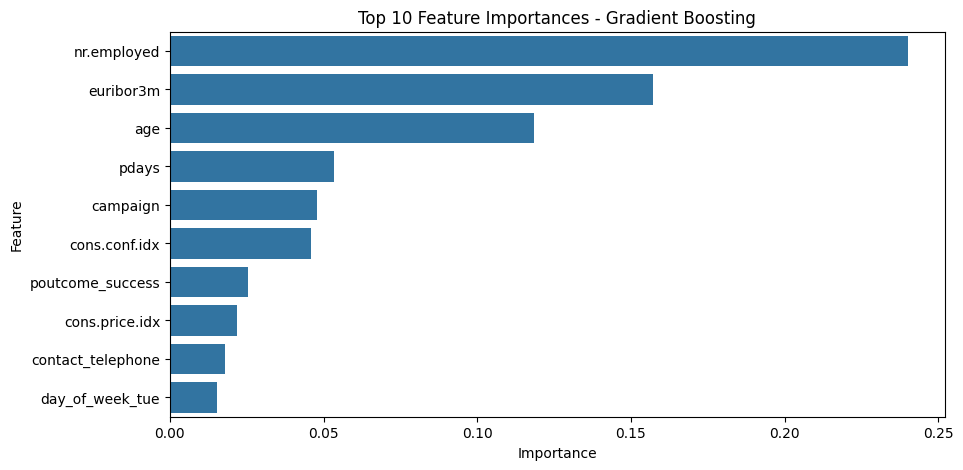

In [123]:
import pandas as pd

feature_importance = pd.Series(gb_random.best_estimator_.feature_importances_, index=X_train.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importances - Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()